Nombre: Juan Felipe Fajardo Garzón

IA y Mini-Robots

Algorítmo Genético para la Generación de una imagen objetivo

Importar las librerías necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

Inicialización de variables, la probabilidad de mutación de un cromosoma y el tamaño del parche de pixeles

In [25]:
prob_muta = 0.4
patch_size = 4
n_generaciones = 3000

Abrir la imagen objetivo y convertirla al formato del colormap, en este caso viridis

[[96 96 96 ... 96 96 96]
 [96 96 96 ... 96 96 96]
 [96 96 96 ... 96 96 96]
 ...
 [96 96 96 ... 96 96 96]
 [96 96 96 ... 96 96 96]
 [96 96 96 ... 96 96 96]]


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


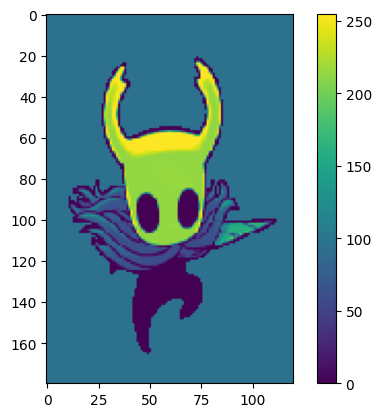

In [4]:

img = Image.open("knight.png") #Se abre el archivo de la imagen

img = img.resize((120, 180)) #la reescalamos al tamaño solicitado

img_gray = img.convert("L") #Convertimos los pixeles de la imagen en una escala de intensidad de 0 a 255

matriz_obj = np.array(img_gray)# Se convierte la imagen a una matriz de numpy
print(matriz_obj)

#Representación de la imagen
plt.imshow(matriz_obj, cmap='viridis')
plt.colorbar()
plt.show()


Generar nuestra población inicial de matrices

In [5]:
def pob_ini():
  pob = np.array([np.random.randint(0, 256, (180, 120)) for _ in range(50)])
  return pob

Función para imprimir la matriz como imagen

In [6]:
def imp(pob):
  plt.imshow(pob, cmap='viridis')
  plt.colorbar()
  plt.show()


Función que calcula la aptitud de toda la población y la guarda en un np array

In [7]:
def calc_aptitud(pob):
  aptitud = np.array([np.exp(-(np.mean((pob[i] - matriz_obj) ** 2))/1000) for i in range(50)])
  aptitud_norm = (aptitud - aptitud.min()) / (aptitud.max() - aptitud.min())
  return aptitud
print(calc_aptitud(pob_ini()))

[0.00014781 0.00013744 0.00014597 0.00015641 0.00014154 0.0001418
 0.00013865 0.00014211 0.00013927 0.00015286 0.00015265 0.00015839
 0.00013049 0.00014927 0.00013045 0.00014648 0.00013137 0.00014387
 0.00013169 0.00014278 0.00016105 0.00014591 0.00013159 0.000153
 0.00013375 0.00016391 0.00015218 0.00013656 0.00019017 0.00013633
 0.00013725 0.0001315  0.0001422  0.00014556 0.00014872 0.00013845
 0.00013869 0.00015669 0.00012825 0.00014833 0.00014772 0.00014519
 0.00014163 0.00012716 0.00014057 0.00013695 0.00016266 0.00015258
 0.00014632 0.00014756]


Función que calcula la probabilidad de selección de cada cromosoma


In [8]:
def calc_prob(aptitud):
  prob = aptitud/np.sum(aptitud)
  return prob
print(calc_prob(calc_aptitud(pob_ini())))


[0.01966764 0.02068937 0.02098078 0.01807913 0.02189065 0.01993255
 0.01963004 0.02064445 0.02237073 0.01961629 0.02152672 0.01778992
 0.0200189  0.0200476  0.01942575 0.0190517  0.02052393 0.01949322
 0.02042873 0.01970365 0.0188018  0.0200338  0.02181325 0.02021134
 0.02144607 0.01731934 0.01843382 0.01943766 0.01934857 0.0195241
 0.01915167 0.01951886 0.02083578 0.02130843 0.01919019 0.01912786
 0.01903955 0.01953547 0.01945311 0.02337867 0.02042091 0.02004281
 0.02227886 0.01868309 0.01982094 0.02068925 0.01980114 0.02059067
 0.02017994 0.01907128]


Función de cruce por parches de pixeles

In [9]:
def crossover_patch(parent_a, parent_b, patch_size=patch_size):
    h,w = parent_a.shape
    y = np.random.randint(0,h-patch_size)
    x = np.random.randint(0,w-patch_size)
    child = parent_a.copy()
    child[y:y+patch_size, x:x+patch_size] = parent_b[y:y+patch_size, x:x+patch_size]
    return child

Función que realiza la selección por elitismo de los cromosomas más aptos, estos 6 cromosomas más aptos son los que van a engendrar los hijos de la nueva generación

In [10]:
def seleccion(pob,prob):
  new_seleccion = []
  for _ in range(6):
    indice =np.argmax(prob)
    new_seleccion.append(pob[indice])
    prob[indice] = 0
  return np.array(new_seleccion)



Función que realiza la mutación, la mutación consiste en 10 parches aleatorios que toman un color aleatorio

In [11]:
def mutacion(prob_muta,cromosoma):
  h,w = cromosoma.shape
  for _ in range(10):
    x = np.random.randint(0,h-patch_size)
    y = np.random.randint(0,w-patch_size)
    mutacion = cromosoma.copy()
    mutacion[x:x+patch_size, y:y+patch_size] = np.random.randint(0,255)
  return mutacion

Ejecución principal del algoritmo genético

Cromosoma más apto de la generacion:  0  Aptitud:  0.00016483392875135634
Cromosoma más apto de la generacion:  1  Aptitud:  0.00016612658345649208
Cromosoma más apto de la generacion:  2  Aptitud:  0.00017435746615457356
Cromosoma más apto de la generacion:  3  Aptitud:  0.00017435746615457356
Cromosoma más apto de la generacion:  4  Aptitud:  0.00017593896269843746
Cromosoma más apto de la generacion:  5  Aptitud:  0.000176594592750699
Cromosoma más apto de la generacion:  6  Aptitud:  0.00017756896638793475
Cromosoma más apto de la generacion:  7  Aptitud:  0.00017881039070811382
Cromosoma más apto de la generacion:  8  Aptitud:  0.00018036838539256143
Cromosoma más apto de la generacion:  9  Aptitud:  0.00018276380425173063
Cromosoma más apto de la generacion:  10  Aptitud:  0.00018388769792077305
Cromosoma más apto de la generacion:  11  Aptitud:  0.00018647632884853007
Cromosoma más apto de la generacion:  12  Aptitud:  0.00018759583169651315
Cromosoma más apto de la generacion: 

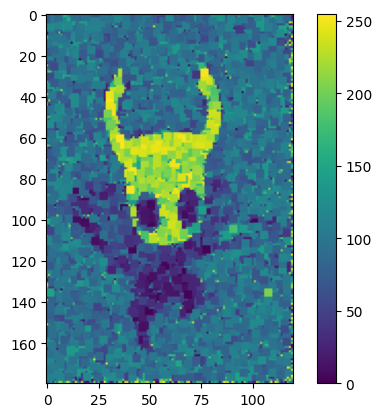

In [26]:
pob = pob_ini()
for i in range(n_generaciones):
  #Selección
  apt = calc_aptitud(pob)
  print("Cromosoma más apto de la generacion: ",i," Aptitud: ",np.max(apt))
  probabilidad = calc_prob(apt)
  current_selection = seleccion(pob,probabilidad)

  #Cruce
  new_gen_list = []
  for z in range(0,5):
    for _ in range(5):
      hijo_1 = crossover_patch(current_selection[z],current_selection[z+1])
      hijo_2 = crossover_patch(current_selection[z+1],current_selection[z])
      new_gen_list.append(hijo_1)
      new_gen_list.append(hijo_2)
  pob = np.array(new_gen_list)

  #Mutacion
  for j in range(50):
    if np.random.rand() < prob_muta:
      pob[j] = mutacion(prob_muta,pob[j])

print("Imagen resultante:")
imp(pob[np.argmax(apt)])